# Titanic Prediction

Possible Progress: 
<br>Complex Machine Learning Algorithms
<br>Novel Feature Engineering
<br>Comprehensive EDA 

<br>Reference Code:
<br>https://www.kaggle.com/startupsci/titanic-data-science-solutions
<br>https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

# Data Preparation and Exploration & Visualization

In [1]:
# Import Libraries for Data Preparation and Exploration & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import Train and Test Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
datasets = [train, test]

In [3]:
# Explore Raw Train Data 1
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Explore Raw Train Data 2
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Explore Raw Train Data 3
train.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# Explore Raw Train Data 4
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S


In [7]:
# Explore Raw Test Data 1
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Explore Raw Test Data 2
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Explore Raw Test Data 3
test.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
# Explore Raw Test Data 4
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.00,5,2,CA 2144,46.9000,NaN,S
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.00,0,2,237789,30.0000,NaN,S
175,1067,2,"Brown, Miss. Edith Eileen",female,15.00,0,2,29750,39.0000,NaN,S
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.00,0,0,350053,7.7958,NaN,S


In [11]:
# Save 'PassengerId' of Test for the Prediction Submission and Drop 'PassengerId' and 'Ticket'
test_id = test["PassengerId"]

train = train.drop(["PassengerId", "Ticket"], axis=1)
test = test.drop(["PassengerId", "Ticket"], axis=1)

In [12]:
# Transform 'Sex' to Numeric Data
train["Sex"] = train["Sex"].map({"female": 1, "male": 0}).astype(int)
test["Sex"] = test["Sex"].map({"female": 1, "male": 0}).astype(int)

In [13]:
# Check Missing 'Embarked'
train[train["Embarked"].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",1,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,80.0,B28,NaN


In [14]:
# Fill 'Embarked' with the Mode
embarked_mode = train["Embarked"].mode()[0]
train["Embarked"] = train["Embarked"].fillna(embarked_mode)

In [15]:
# Check Missing 'Fare'
test[test["Fare"].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",0,60.5,0,0,NaN,NaN,S


In [16]:
# Fill 'Fare' with the Mean of the Same 'Pclass'
fare_class_mean = test[test["Pclass"] == 3]["Fare"].mean()
test["Fare"] = test["Fare"].fillna(fare_class_mean)

In [17]:
# Fill 'Cabin' with 'XXX'
train["Cabin"] = train["Cabin"].fillna("XXX")
test["Cabin"] = test["Cabin"].fillna("XXX")

In [18]:
# Check Correlated Features with Age in Train
train.corr().abs()["Age"].sort_values(ascending=False)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Sex         0.093254
Survived    0.077221
Name: Age, dtype: float64

In [19]:
# Check Correlated Features with Age in Test
test.corr().abs()["Age"].sort_values(ascending=False)

Age       1.000000
Pclass    0.492143
Fare      0.332484
SibSp     0.091587
Parch     0.061249
Sex       0.000013
Name: Age, dtype: float64

In [20]:
# Find Number of Missing 'Age' Values in both Train and Test
print("# of Null 'Age' in train set: {}".format(train["Age"].isna().sum()))
print("# of Null 'Age' in test set: {}".format(test["Age"].isna().sum()))

# of Null 'Age' in train set: 177
# of Null 'Age' in test set: 86


In [21]:
# Find the Mean 'Age' of the Same Train 'Pclass'
age_class_mean_train = train.groupby(by=["Pclass"]).mean()["Age"].round(0).astype(int)
age_class_mean_train

Pclass
1    38
2    30
3    25
Name: Age, dtype: int32

In [22]:
# Fill 'Age' with the Mean of the Same Train 'Pclass'
for i in range(3):
    train.loc[(train["Age"].isnull()) & (train["Pclass"] == i+1), "Age"] = age_class_mean_train.loc[i+1]

In [23]:
# Find the Mean 'Age' of the Same Test 'Pclass'
age_class_mean_test = test.groupby(by=["Pclass"]).mean()["Age"].round(0).astype(int)
age_class_mean_test

Pclass
1    41
2    29
3    24
Name: Age, dtype: int32

In [24]:
# Fill 'Age' with the Mean of the Same Train 'Pclass'
for i in range(3):
    test.loc[(test["Age"].isnull()) & (test["Pclass"] == i+1), "Age"] = age_class_mean_test.loc[i+1]

In [25]:
# Check Number of Missing 'Age' Values in both Train and Test
print("# of Null 'Age' in train set: {}".format(train["Age"].isna().sum()))
print("# of Null 'Age' in test set: {}".format(test["Age"].isna().sum()))

# of Null 'Age' in train set: 0
# of Null 'Age' in test set: 0


<Axes: xlabel='Sex', ylabel='Survived'>

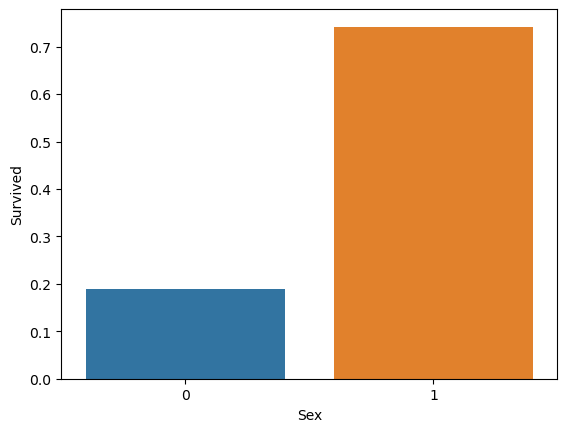

In [26]:
# Visualize 'Sex' Feature
sns.barplot(x="Sex", y="Survived", data=train, ci=None)

<Axes: xlabel='Pclass', ylabel='Survived'>

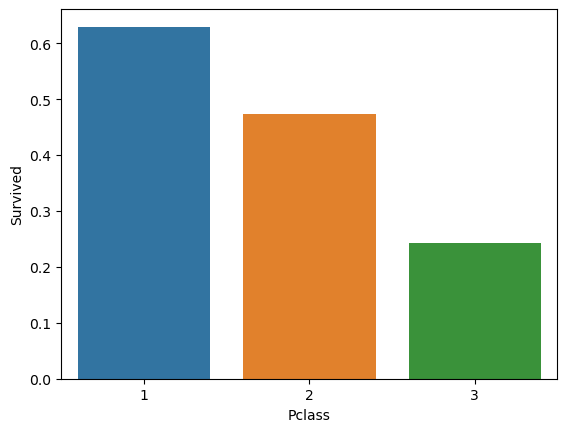

In [27]:
# Visualize 'Pclass' Feature
sns.barplot(x="Pclass", y="Survived", data=train, ci=None)

In [28]:
# Create 5 'Age' Interval
list(pd.cut(train['Age'], 5).unique().sort_values())

[Interval(0.34, 16.336, closed='right'),
 Interval(16.336, 32.252, closed='right'),
 Interval(32.252, 48.168, closed='right'),
 Interval(48.168, 64.084, closed='right'),
 Interval(64.084, 80.0, closed='right')]

In [29]:
# Make 'Age' Categorical
train.loc[train["Age"] <= 16, "Age"] = 0
train.loc[(train["Age"] > 16) & (train["Age"] <= 32), "Age"] = 1
train.loc[(train["Age"] > 32) & (train["Age"] <= 48), "Age"] = 2
train.loc[(train["Age"] > 48) & (train["Age"] <= 64), "Age"] = 3
train.loc[train["Age"] > 64, "Age"] = 4

test.loc[test["Age"] <= 16, "Age"] = 0
test.loc[(test["Age"] > 16) & (test["Age"] <= 32), "Age"] = 1
test.loc[(test["Age"] > 32) & (test["Age"] <= 48), "Age"] = 2
test.loc[(test["Age"] > 48) & (test["Age"] <= 64), "Age"] = 3
test.loc[train["Age"] > 64, "Age"] = 4

<Axes: xlabel='Age', ylabel='Survived'>

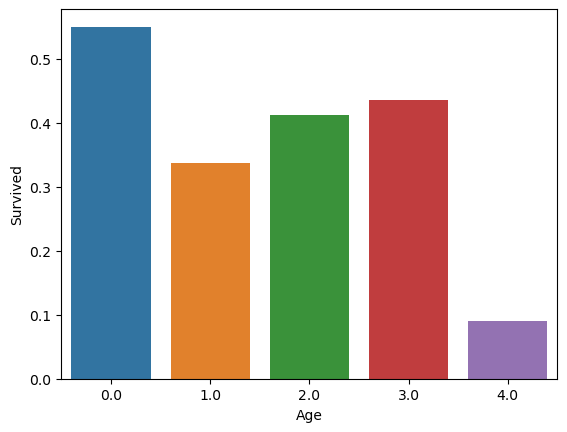

In [30]:
# Visualize 'Age' Feature
sns.barplot(x="Age", y="Survived", data=train, ci=None)

In [31]:
# Create 5 'Fare' Interval
list(pd.qcut(train["Fare"], 4).unique().sort_values())

[Interval(-0.001, 7.91, closed='right'),
 Interval(7.91, 14.454, closed='right'),
 Interval(14.454, 31.0, closed='right'),
 Interval(31.0, 512.329, closed='right')]

In [32]:
# Make 'Fare' Categorical
train.loc[train["Fare"] <= 7.91, "Fare"] = 0
train.loc[(train["Fare"] > 7.91) & (train["Fare"] <= 14.454), "Fare"] = 1
train.loc[(train["Fare"] > 14.454) & (train["Fare"] <= 31), "Fare"] = 2
train.loc[train["Fare"] > 31, "Fare"] = 3
train["Fare"] = train["Fare"].astype(int)

test.loc[test["Fare"] <= 7.91, "Fare"] = 0
test.loc[(test["Fare"] > 7.91) & (test["Fare"] <= 14.454), "Fare"] = 1
test.loc[(test["Fare"] > 14.454) & (test["Fare"] <= 31), "Fare"] = 2
test.loc[test["Fare"] > 31, "Fare"] = 3
test["Fare"] = test["Fare"].astype(int)

<Axes: xlabel='Fare', ylabel='Survived'>

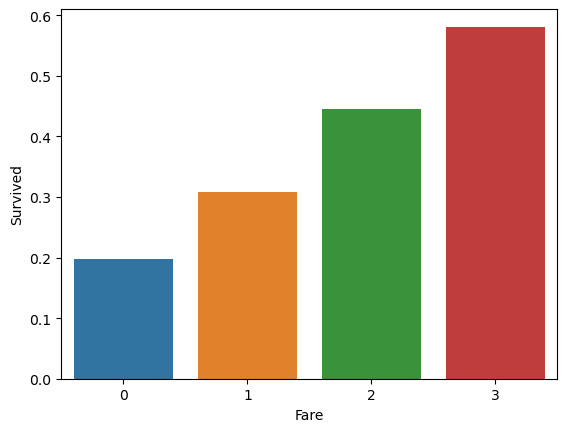

In [33]:
# Visualize 'Fare' Feature
sns.barplot(x="Fare", y="Survived", data=train, ci=None)

In [34]:
# Get The First Char of 'Cabin'
train["Cabin"] = train["Cabin"].apply(lambda x: x[0])

test["Cabin"] = test["Cabin"].apply(lambda x: x[0])

<Axes: xlabel='Cabin', ylabel='Survived'>

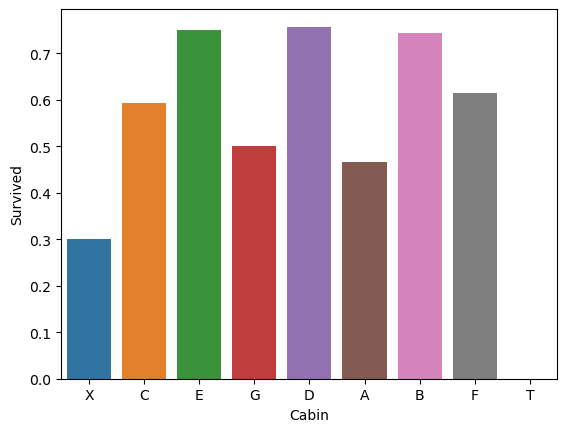

In [35]:
# Visualize 'Cabin' Feature
sns.barplot(x="Cabin", y="Survived", data=train, ci=None)

In [36]:
# Craete 'Family' Feature that Represent Family Size
train["Family"] = train["SibSp"] + train["Parch"] + 1

test["Family"] = test["SibSp"] + test["Parch"] + 1

<Axes: xlabel='Family', ylabel='Survived'>

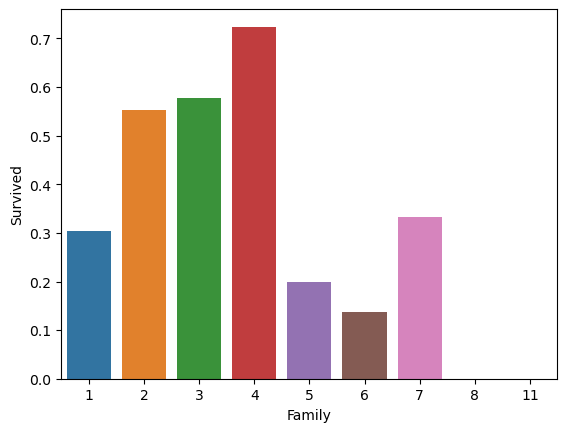

In [37]:
# Visualize 'Family' Feature 1
sns.barplot(x="Family", y="Survived", data=train, ci=None)

In [38]:
# Create 3 'Family' Category
train.loc[(train["Family"] > 1) & (train["Family"] <= 4), "Family"] = 2 
train.loc[(train["Family"] > 4), "Family"] = 3 

test.loc[(test["Family"] > 1) & (test["Family"] <= 4), "Family"] = 2 
test.loc[(test["Family"] > 4), "Family"] = 3 

In [39]:
# Drop 'SibSp' and 'Parch'
train = train.drop(["SibSp", "Parch"], axis=1)
test = test.drop(["SibSp", "Parch"], axis=1)

<Axes: xlabel='Family', ylabel='Survived'>

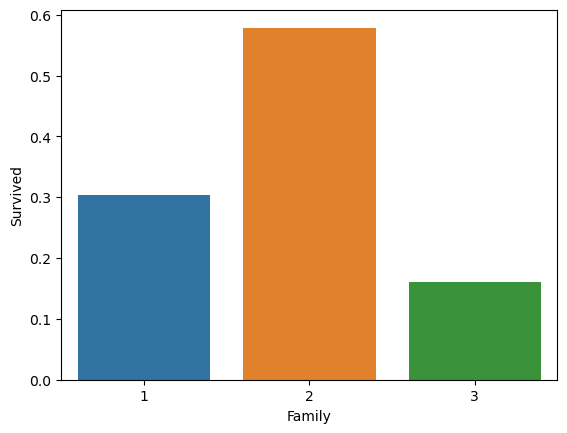

In [40]:
# Visualize 'Family' Feature 2
sns.barplot(x="Family", y="Survived", data=train, ci=None)

In [41]:
# Find 'Title'
train["Title"] = train["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

test["Title"] = test["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [42]:
# Find Unique 'Title' in Train
train.groupby("Title")["Title"].count()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Title, dtype: int64

In [43]:
# Find Unique 'Title' in Test
test.groupby("Title")["Title"].count()

Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: Title, dtype: int64

In [44]:
# Collect Rare Titles
train["Title"] = train["Title"].replace(["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "the Countess"], "Rare")
train["Title"] = train["Title"].replace("Mlle", "Miss")
train["Title"] = train["Title"].replace("Ms", "Miss")
train["Title"] = train["Title"].replace("Mme", "Mrs")

test["Title"] = test["Title"].replace(["Col","Dona", "Dr", "Rev"], "Rare")
test["Title"] = test["Title"].replace("Ms", "Miss")
test["Title"] = test["Title"].replace("Mme", "Mrs")

<Axes: xlabel='Title', ylabel='Survived'>

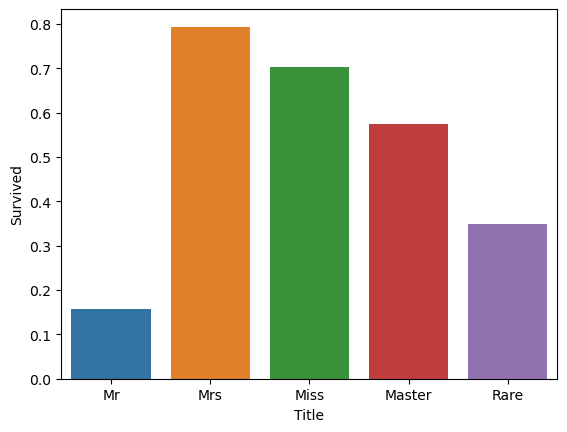

In [45]:
# Visualize 'Title' Feature
sns.barplot(x="Title", y="Survived", data=train, ci=None)

In [46]:
# Drop 'Name'
train = train.drop(["Name"], axis=1)

test = test.drop(["Name"], axis=1)

In [47]:
# Get Number of Train Sample
train_set_lenght = len(train)
train_set_lenght

891

In [48]:
# Concatenate Train and Test Data to Create Dummy Variables
all_data = pd.concat([train, test])

all_data = pd.get_dummies(all_data)

In [49]:
# Split Train and Test Data
train = all_data.iloc[:891]

test = all_data.iloc[891:].drop("Survived", axis=1)

In [50]:
# Final Train Data
print(train.shape)
train.head()

(891, 23)


,Survived,Pclass,Sex,Age,Fare,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,1.0,0,2,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1.0,1,1,2.0,3,2,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,3,1,1.0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,1.0,1,1,2.0,3,2,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.0,3,0,2.0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [51]:
# Final Test Data
print(test.shape)
test.head()

(418, 22)


,Pclass,Sex,Age,Fare,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,2.0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,3,1,2.0,0,2,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,0,3.0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,3,0,1.0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,3,1,1.0,1,2,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# Expetimentation & Prediction

In [52]:
# Import Libraries for Expetimentation & Prediction
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
# Create Target Feature
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [54]:
# Separate Train and Test Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
# Train the Decision Tree Model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
# Make Predictions
predictions = dtree.predict(X_test)

In [57]:
# Test results 1
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       166
         1.0       0.81      0.70      0.75       102

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [58]:
# Test results 2
print(confusion_matrix(y_test,predictions))

[[149  17]
 [ 31  71]]


# Submission

In [59]:
# Fit Machine Learning Model
dtree = DecisionTreeClassifier()
dtree.fit(train.drop("Survived",axis=1), train["Survived"])

DecisionTreeClassifier()

In [60]:
# Predict with Machine Learning Model
predictions = dtree.predict(test)

In [61]:
# Create Submission Dataframe
submission = pd.DataFrame()
submission["PassengerId"] = test_id
submission["Survived"] = predictions.astype(int)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
# Write Submission Dataframe
submission.to_csv('submission.csv',index=False)